In [24]:
#imports
import pandas as pd
import numpy as np
import datetime as dt
import sys
import matplotlib.pyplot as plt
from seaborn import set as sns

In [25]:
#other declarations
counter = 0
flag = 0
time_zero = dt.datetime.now()
roylab_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQuDj0R6K85sdtI8I-Tc7RCx8CnIxKUQue0TCUdrFOKDw9G3JRtGhl64laDd3apApEvIJTdPFJ9fEUL/pub?gid=0&output=csv&sheet=CR_ROYLAB"
sns(style="darkgrid")

In [26]:
#function definitions
def format_df(df1):
  df1.drop(columns=[df1.columns[0]], inplace=True)
  df1 = df1.copy().loc[:224,]
  time_curr = dt.datetime.now()
  df1["Time"] = len(df1) * ["{}.{}.{}.{}.{}.{}".format(time_curr.day, time_curr.month, time_curr.year, time_curr.hour, time_curr.minute, time_curr.second)]
  t1 = (time_curr.month-1)*31*86400 + (time_curr.day-1)*86400 + time_curr.hour*3600 + time_curr.minute*60 + time_curr.second
  df1["timestamp"] = len(df1) * ["{}".format(t1)]
  df1.set_index(["Nation", "Time"], inplace=True)
  return df1

# master_df = pd.read_csv("data_csv/master.csv").set_index(["Nation", "Time"])
def update(df_master):
    df_t = pd.read_csv(roylab_url)
    df_t = format_df(df_t)
    updated_df = df_master.append(df_t)
    updated_df.sort_values(by=["Nation", "timestamp"], inplace=True)
    updated_df.to_csv("data_csv/master.csv", index=True)
    updated_df.to_csv("data_csv/master1.csv", index=True)
    print(updated_df.head())


In [27]:
try:
    df_master = pd.read_csv("data_csv/master1.csv").set_index(["Nation", "Time"])
    update(df_master)
except:
    print("master1 does not exist")
    try:
        df_master = pd.read_csv("data_csv/master.csv").set_index(["Nation", "Time"])
        update(df_master)
    except:
        print("master does not exist")
        df_t = pd.read_csv(roylab_url)
        df_t = format_df(df_t)
        df_t.to_csv("data_csv/master.csv", index=True)
        df_t.to_csv("data_csv/master1.csv", index=True)
        df_master = pd.read_csv("data_csv/master.csv").set_index(["Nation", "Time"])
        update(df_master)

                               Confirmed Case  Death  Recover timestamp
Nation      Time                                                       
AFGHANISTAN 3.4.2020.14.30.10           273.0    7.0     10.0   8260210
            3.4.2020.14.30.11           273.0    7.0     10.0   8260211
            3.4.2020.17.30.12           273.0    7.0     10.0   8271012
            3.4.2020.20.30.12           273.0    7.0     10.0   8281812
            3.4.2020.23.30.19           281.0    7.0     10.0   8292619


                      Time  Confirmed Case   Death  Recover  timestamp
Nation                                                                
INDIA    23.5.2020.22.2.48        131009.0  3860.0  54179.0   12693768
INDIA      24.5.2020.0.0.2        131423.0  3868.0  54385.0   12700802
INDIA   24.5.2020.12.54.52        132009.0  3869.0  54441.0   12747292
INDIA    24.5.2020.16.7.25        132755.0  3899.0  54818.0   12758845
INDIA   24.5.2020.18.12.44        132755.0  3901.0  54819.0   12766364
INDIA    24.5.2020.22.29.8        138049.0  4014.0  57429.0   12781748
INDIA     25.5.2020.1.32.8        138536.0  4024.0  57692.0   12792728
INDIA    25.5.2020.9.46.16        138845.0  4024.0  57721.0   12822376
INDIA   25.5.2020.12.12.38        139051.0  4024.0  57721.0   12831158
INDIA    25.5.2020.15.12.3        139911.0  4039.0  57976.0   12841923


<IPython.core.display.Javascript object>


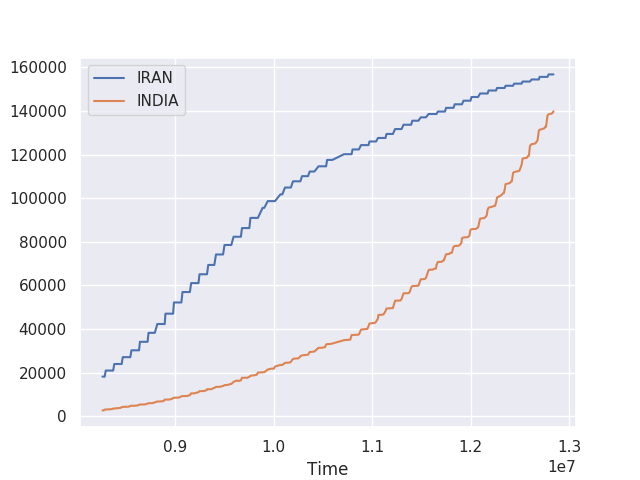

In [28]:
df_check = pd.read_csv("data_csv/master1.csv").set_index(["Nation"])
df_check0 = df_check.loc["TURKEY"]  #BLUE
df_check1 = df_check.loc["INDIA"] #ORANGE
print(df_check1.tail(10))
yi = df_check0["Confirmed Case"]
yu = df_check1["Confirmed Case"]
# yi = df_check0["Death"]
# yu = df_check1["Death"]
Xi = df_check0["timestamp"]
Xu = df_check1["timestamp"]
plt.figure()
plt.plot(Xi,yi,label="IRAN")
plt.plot(Xu,yu, label="INDIA")
plt.xlabel("Time")
plt.ylabel("Confirmed Case")
plt.legend()
plt.show()

In [30]:
!cp data_csv/master.csv data_csv/backup/
!cp data_csv/master1.csv data_csv/backup/

In [31]:
print('Difference {}'.format(yi[-1:][0]-yu[-1:][0]))
# print(yi[-1:][0])

Difference 16916.0


<IPython.core.display.Javascript object>


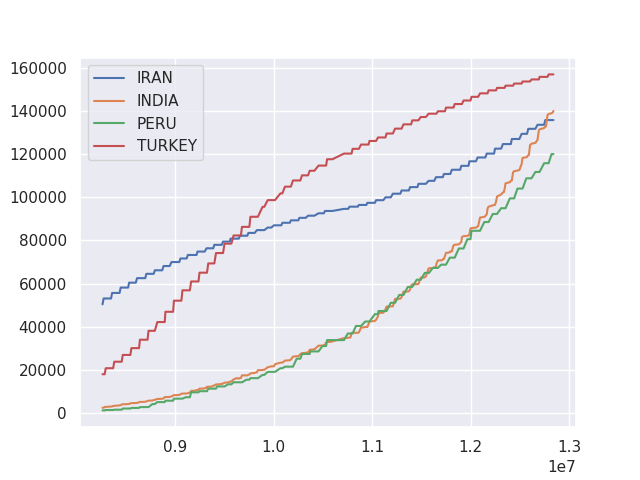

In [32]:
%matplotlib notebook
plot_list = ["IRAN", "INDIA", "PERU", "TURKEY"]
plt.figure()
for i in plot_list:
    df_test = df_check.loc[i]
    X = df_test["timestamp"]
    y = df_test["Confirmed Case"]
    plt.plot(X,y,label=i)
plt.legend()
plt.savefig("graph.png")